In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
df=pd.read_csv('/home/thamanna/Downloads/train.csv')
df.head(20)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [79]:
df.dtypes


ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [80]:
df.shape

(50882, 14)

The aim to create a model to predict customer's response to an insurance policy recommendation.

In [81]:
for col in df:
    missing_count=df[col][df[col]=='?'].count()
    nan_count=df[col].isna().sum()
    tota_missing=missing_count + nan_count
    if tota_missing:
        print(f"column '{col}':'?'={missing_count},Nan={nan_count},Total_missing={tota_missing}")
    


column 'Health Indicator':'?'=0,Nan=11691,Total_missing=11691
column 'Holding_Policy_Duration':'?'=0,Nan=20251,Total_missing=20251
column 'Holding_Policy_Type':'?'=0,Nan=20251,Total_missing=20251


In [82]:
for col in df.select_dtypes(include=['object','float64']).columns:
    uniqu_vals=df[col].dropna().unique()
    print(f"column'{col}'({len(uniqu_vals)} unique values)")
    print(uniqu_vals)
    print('-'*50)

column'City_Code'(36 unique values)
['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
--------------------------------------------------
column'Accomodation_Type'(2 unique values)
['Rented' 'Owned']
--------------------------------------------------
column'Reco_Insurance_Type'(2 unique values)
['Individual' 'Joint']
--------------------------------------------------
column'Is_Spouse'(2 unique values)
['No' 'Yes']
--------------------------------------------------
column'Health Indicator'(9 unique values)
['X1' 'X2' 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
--------------------------------------------------
column'Holding_Policy_Duration'(15 unique values)
['14+' '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
--------------------------------------------------
column'Holding_Policy_Type'(4 un

In [83]:
missing_proportion=df.isna().mean()
for col, prop in missing_proportion.items():
    if prop:
        print(f"columns '{col}',:{prop:.2%} missing")

columns 'Health Indicator',:22.98% missing
columns 'Holding_Policy_Duration',:39.80% missing
columns 'Holding_Policy_Type',:39.80% missing


Since the proportion of missing values are larger we cannot drop them from the data. So for Holding_Policy_Type' and 'Holding_Policy_Duration' we can use median imputation
For Health Indicator we can replace it with new value 'Unknown'

In [84]:
df['Holding_Policy_Type']=df['Holding_Policy_Type'].replace(np.nan,np.mean(df['Holding_Policy_Type']))
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].replace('14+','15')
df['Holding_Policy_Duration']=pd.to_numeric(df['Holding_Policy_Duration'],errors='coerce')
print(np.mean(df['Holding_Policy_Duration']))
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].replace(np.nan,6)
df['Health Indicator']=df['Health Indicator'].replace(np.nan,'Unknown')


6.1567692860174335


In [85]:
missing_proportion=df.isna().mean()
for col, prop in missing_proportion.items():
    if prop:
        print(f"columns '{col}',:{prop:.2%} missing")
else:
    print('No missing values')

No missing values


We have removed all the missing values from the data

In [86]:
df['Response'].value_counts()

Response
0    38673
1    12209
Name: count, dtype: int64

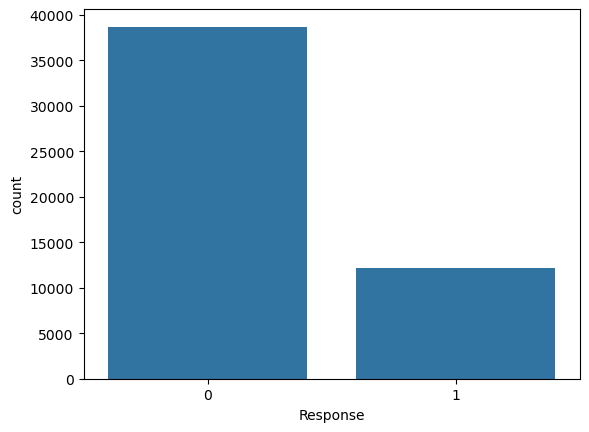

In [87]:
sns.countplot(x='Response',data= df)
plt.show()

Most of the people said no to the insurance offer.

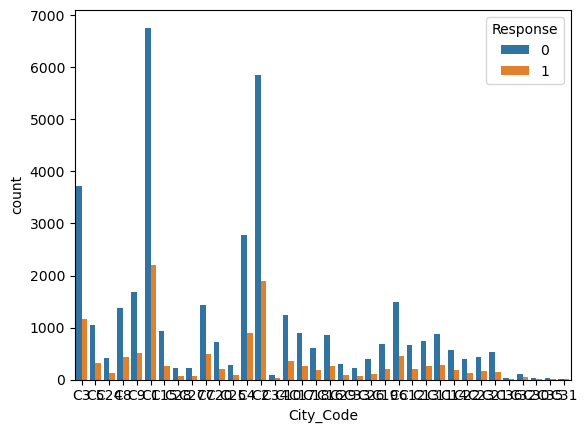

In [88]:
sns.countplot(x='City_Code',hue='Response',data=df)
plt.show()


Since city and region does not affect the person's whish to take the policy or not. We can remove them from the data.Also remove Id because it does not contain any preditive information.

In [89]:
df.drop(['Region_Code','City_Code','ID'],axis=1,inplace=True)
df.shape

(50882, 11)

In [90]:
df.columns

Index(['Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age',
       'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response'],
      dtype='object')

/tmp/ipykernel_4127/2088653855.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Accomodation_Type']=df['Accomodation_Type'].replace({'Rented':0,'Owned':1})


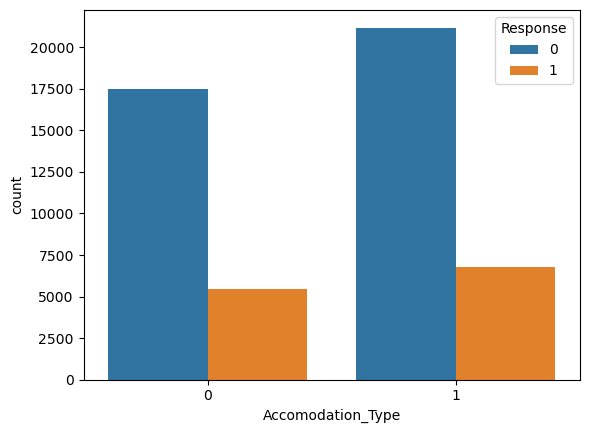

In [91]:
df['Accomodation_Type']=df['Accomodation_Type'].replace({'Rented':0,'Owned':1})
sns.countplot(x='Accomodation_Type',hue='Response',data=df)
plt.show()

Response is evenly  distributed acros Accomodation_Type.

/tmp/ipykernel_4127/3418327027.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].replace({'Individual':0,'Joint':1})


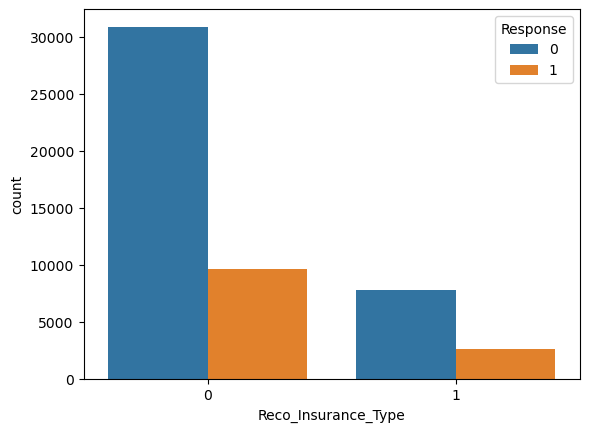

In [92]:
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].replace({'Individual':0,'Joint':1})
sns.countplot(x='Reco_Insurance_Type',hue='Response',data=df)
plt.show()

Respone is evenly distributed across Reco_Insurance_Type.

We should create a new column 'Age difference' to capture the age gap in joint policies.The original Upper_Age and Lower_Age columns should be dropped.

In [93]:
df['Age difference']=df['Upper_Age']-df['Lower_Age']
df.drop(['Upper_Age','Lower_Age'],axis=1,inplace=True)
print(df.columns)

Index(['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'Age difference'],
      dtype='object')


/tmp/ipykernel_4127/3829222644.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Response'] == 0),'Age difference'] , color='b',shade=True,label='Response')
/tmp/ipykernel_4127/3829222644.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Response'] == 1),'Age difference'] , color='r',shade=True, label='Response')


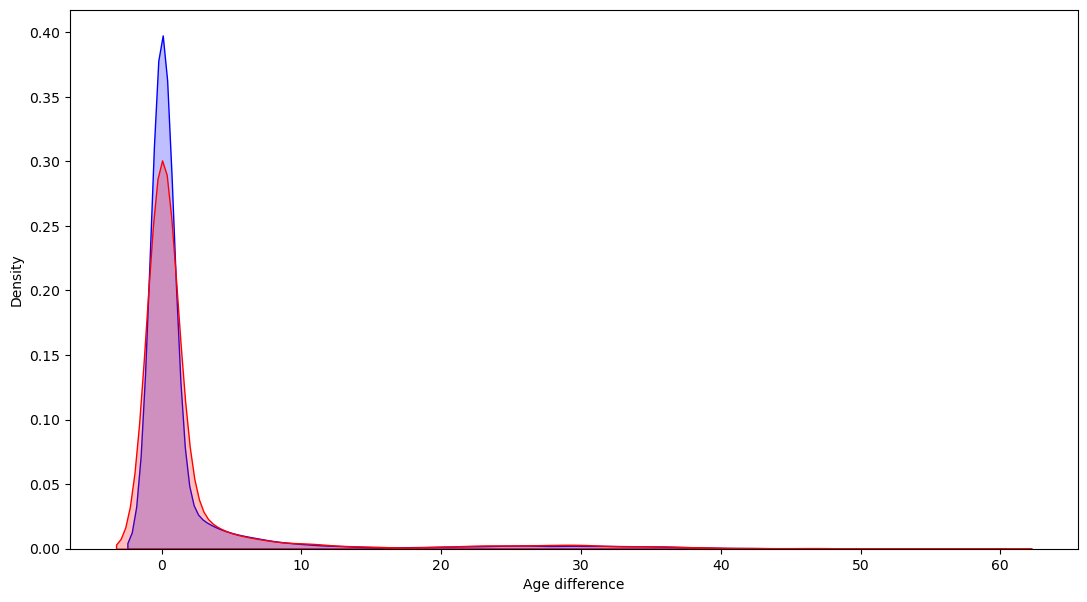

In [94]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['Response'] == 0),'Age difference'] , color='b',shade=True,label='Response')
ax=sns.kdeplot(df.loc[(df['Response'] == 1),'Age difference'] , color='r',shade=True, label='Response')

/tmp/ipykernel_4127/793958642.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Is_Spouse']=df['Is_Spouse'].replace({'No':0,'Yes':1})


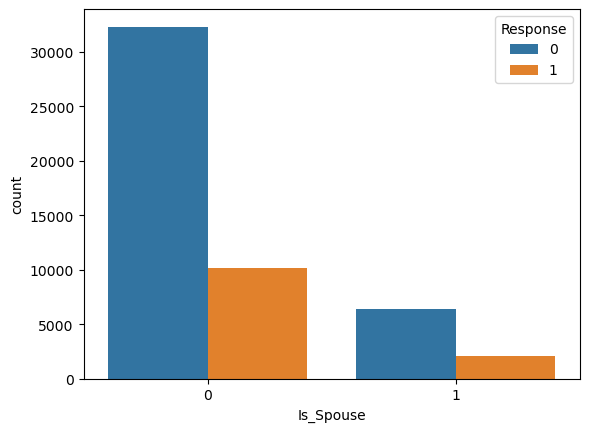

In [95]:
df['Is_Spouse']=df['Is_Spouse'].replace({'No':0,'Yes':1})
sns.countplot(x='Is_Spouse',hue='Response',data=df)
plt.show()

/tmp/ipykernel_4127/1629876257.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Health Indicator']=df['Health Indicator'].replace({'X1':1,'X2':2,'X4':4,'X3':3,'X6':6,'X5':5,'X8':8, 'X7':7,'X9':9,'Unknown':0})


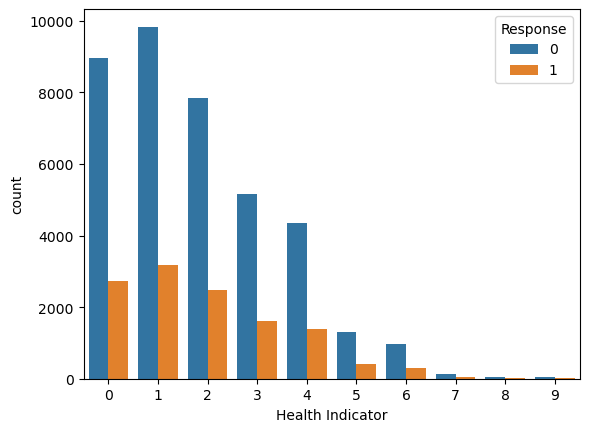

In [96]:
df['Health Indicator']=df['Health Indicator'].replace({'X1':1,'X2':2,'X4':4,'X3':3,'X6':6,'X5':5,'X8':8, 'X7':7,'X9':9,'Unknown':0})
sns.countplot(x='Health Indicator',hue='Response',data=df)
plt.show()

Since Health Indicator 5,6,7,8,9 have least number of observation we can combine them as one indicator 5.

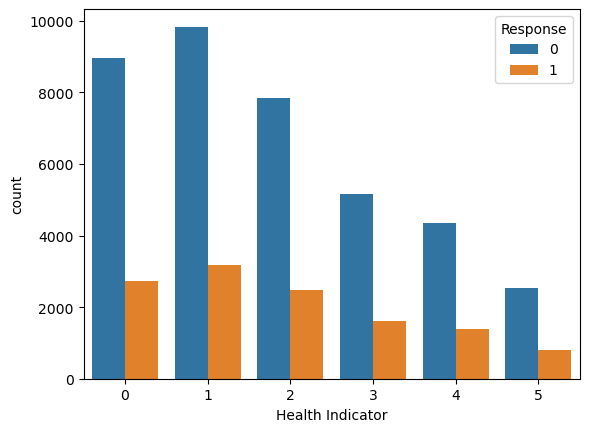

In [97]:
df['Health Indicator']=df['Health Indicator'].replace({6:5,7:5,8:5,9:5})
sns.countplot(x='Health Indicator',hue='Response',data=df)
plt.show()

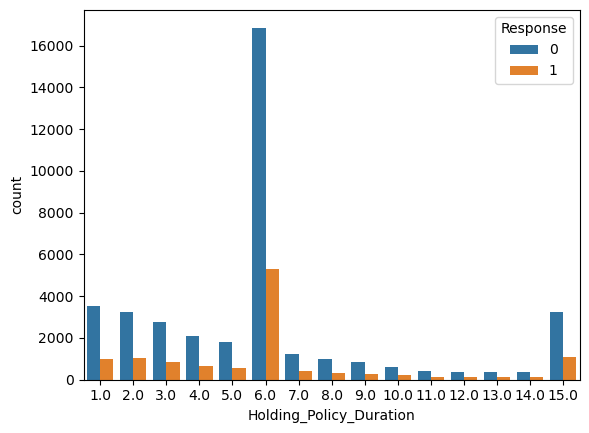

In [98]:
sns.countplot(x='Holding_Policy_Duration',hue='Response',data=df)
plt.show()

Since there are somany catogaries we can combine them.

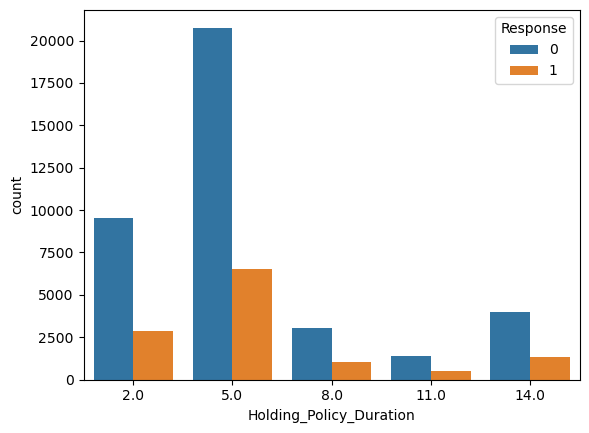

In [99]:
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].replace({1:2,3:2,4:5,6:5,7:8,9:8,10:11,12:11,13:14,15:14})
sns.countplot(x='Holding_Policy_Duration',hue='Response',data=df)

plt.show()

Customers with a Health Indicator of 1 or 2, and those with shorter Holding_Policy_Duration periods, appear slightly more likely to accept the insurance offer.

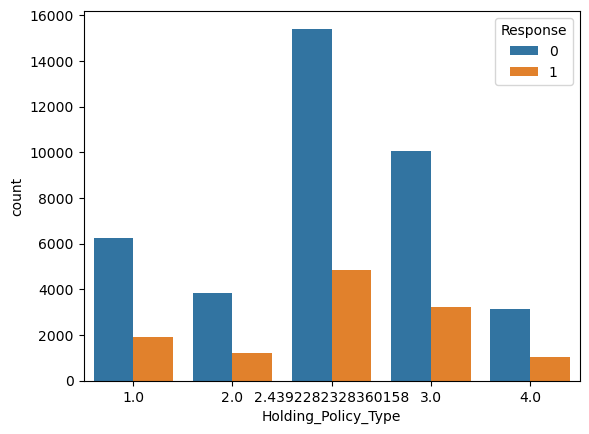

In [102]:
sns.countplot(x='Holding_Policy_Type',hue='Response',data=df)
plt.show()

/tmp/ipykernel_4127/1959831431.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Response'] == 0),'Reco_Policy_Cat'] , color='b',shade=True,label='Response')
/tmp/ipykernel_4127/1959831431.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Response'] == 1),'Reco_Policy_Cat'] , color='r',shade=True, label='Response')


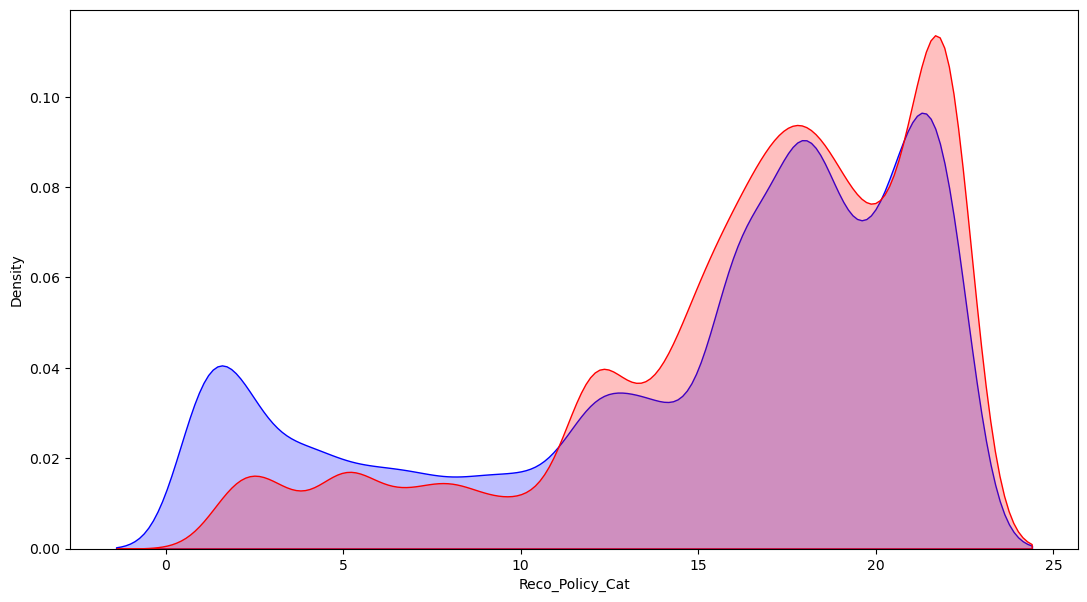

In [103]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['Response'] == 0),'Reco_Policy_Cat'] , color='b',shade=True,label='Response')
ax=sns.kdeplot(df.loc[(df['Response'] == 1),'Reco_Policy_Cat'] , color='r',shade=True, label='Response')

/tmp/ipykernel_4127/3026041010.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Response'] == 0),'Reco_Policy_Premium'] , color='b',shade=True,label='Response')
/tmp/ipykernel_4127/3026041010.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Response'] == 1),'Reco_Policy_Premium'] , color='r',shade=True, label='Response')


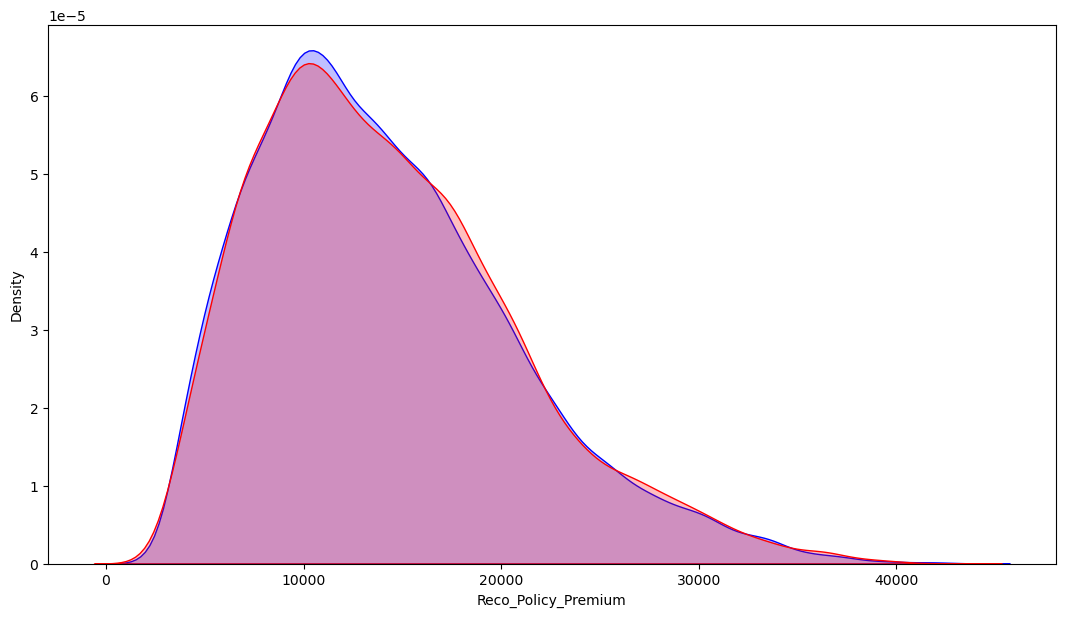

In [104]:

fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['Response'] == 0),'Reco_Policy_Premium'] , color='b',shade=True,label='Response')
ax=sns.kdeplot(df.loc[(df['Response'] == 1),'Reco_Policy_Premium'] , color='r',shade=True, label='Response')


The distribution of Reco_Policy_Cat and Reco_Policy_Premium shows some variation between the two response groups. So the type and cost of the recommended policy influence a customer's decision.


In [105]:
df.columns

Index(['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'Age difference'],
      dtype='object')

<Axes: >

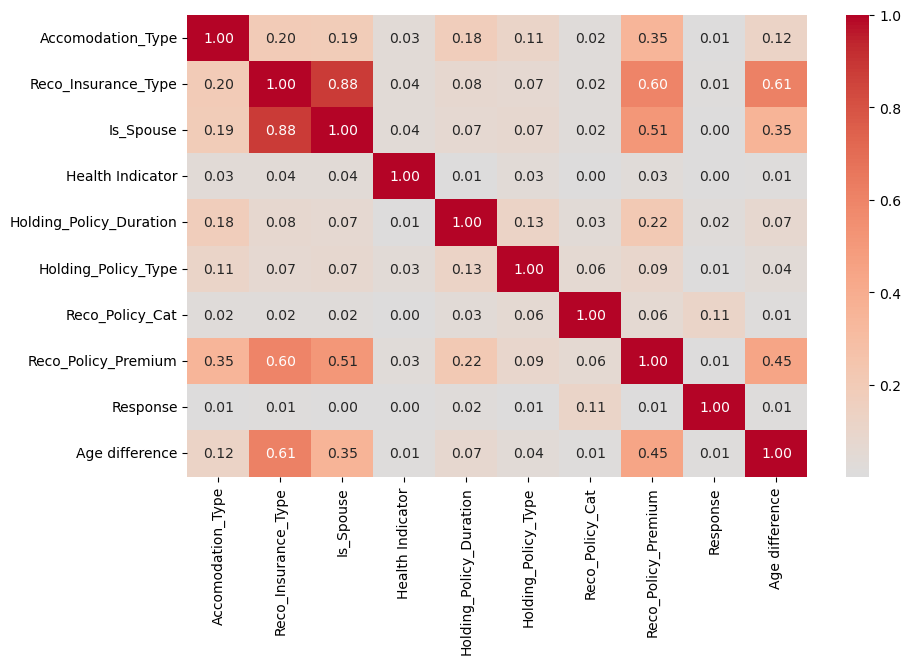

In [106]:
cols=['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'Age difference']
ncols=df[cols].columns.tolist()
corr_matrix=df[ncols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

Since Reco_Insurance_Type and Is_Spouse has high correlation we can remove one of this column from the data. Let remove Is_Spouse

In [107]:
df.drop(['Is_Spouse'],axis=1,inplace=True)

In [108]:
df.shape

(50882, 9)

In [109]:
cols=['Accomodation_Type', 'Reco_Insurance_Type','Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'Age difference']
ncl2=df[cols].columns
SKEW_THRESHOLD = 2.0
KURT_THRESHOLD = 2.0
ZERO_RATIO_THRESHOLD = 0.10
dft = df.copy()
stats_list = []
for col in ncl2:
    series = dft[col]
    skew_before = series.skew()
    kurt_before = series.kurtosis()
    std_before = series.std()
    transform_type = "NA"
    transform_needed = "No"
    skew_after = skew_before
    kurt_after = kurt_before
    std_after = std_before

    if abs(skew_before) > SKEW_THRESHOLD and abs(kurt_before) > KURT_THRESHOLD:
        zero_ratio = (series == 0).mean()

        if zero_ratio <= ZERO_RATIO_THRESHOLD and (series > 0).all():
            transform_type = "log"
            dft[col] = np.log(series)
        else:
            transform_type = "log1p"
            dft[col] = np.log1p(series.clip(lower=0))

        transform_needed = "Yes"
        skew_after = dft[col].skew()
        kurt_after = dft[col].kurtosis()
        std_after = dft[col].std()

    stats_list.append({
        "numeric_column": col,
        "skew_before": skew_before,
        "kurtosis_before": kurt_before,
        "std_before": std_before,
        "log_transform_needed": transform_needed,
        "log_type": transform_type,
        "skew_after": skew_after,
        "kurtosis_after": kurt_after,
        "std_after": std_after
    })

stat_df = pd.DataFrame(stats_list)
stat_df


,numeric_column,skew_before,kurtosis_before,std_before,log_transform_needed,log_type,skew_after,kurtosis_after,std_after
0,Accomodation_Type,-0.198293,-1.960757,0.497566,No,NA,-0.198293,-1.960757,0.497566
1,Reco_Insurance_Type,1.474244,0.173401,0.402482,No,NA,1.474244,0.173401,0.402482
2,Health Indicator,0.516891,-0.779025,1.524875,No,NA,0.516891,-0.779025,1.524875
3,Holding_Policy_Duration,1.277934,0.864512,3.497540,No,NA,1.277934,0.864512,3.497540
4,Holding_Policy_Type,-0.256341,0.002902,0.795995,No,NA,-0.256341,0.002902,0.795995
5,Reco_Policy_Cat,-0.928224,-0.310533,6.340663,No,NA,-0.928224,-0.310533,6.340663
6,Reco_Policy_Premium,0.782463,0.423053,6590.074873,No,NA,0.782463,0.423053,6590.074873
7,Response,1.217936,-0.516653,0.427055,No,NA,1.217936,-0.516653,0.427055
8,Age difference,4.182472,18.294903,6.865406,Yes,log1p,2.357293,4.578296,0.895653


Only one column Age difference has high kurtosis and underwent log1p transformation.

In [110]:
df.shape

(50882, 9)

In [112]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Accomodation_Type,0.0,1.000000,1.0,1.0,0.0,0.0,1.000000,1.0,1.0,1.0
Reco_Insurance_Type,0.0,1.000000,0.0,1.0,0.0,0.0,0.000000,1.0,1.0,1.0
Health Indicator,1.0,2.000000,0.0,1.0,2.0,2.0,0.000000,4.0,1.0,0.0
Holding_Policy_Duration,14.0,5.000000,2.0,14.0,2.0,5.0,5.000000,8.0,14.0,8.0
Holding_Policy_Type,3.0,2.439228,1.0,3.0,1.0,1.0,2.439228,4.0,3.0,4.0
Reco_Policy_Cat,22.0,22.000000,19.0,19.0,16.0,22.0,17.000000,17.0,1.0,18.0
Reco_Policy_Premium,11628.0,30510.000000,7450.0,17780.0,10404.0,15264.0,10640.000000,29344.0,27283.2,21100.8
Response,0.0,0.000000,1.0,0.0,0.0,1.0,0.000000,1.0,0.0,1.0
Age difference,0.0,53.000000,0.0,4.0,0.0,0.0,0.000000,2.0,9.0,33.0


In [113]:
import pickle as pkl
with open('us_130.pkl', 'wb') as f:
    pkl.dump(df,f)
print("done")

done


Data analysis of the dataset is done  predicte a customer's response to an insurance policy recommendation.The features included in the data set are customer demographics, accommodation type, insurance type, policy details, and the target variable, Response.The objective was to clean the data and handle missing values.Several preprocessing steps were executed they are;    

.A significant percentage of missing values were identified in three columns:Health Indicator: 22.98% missing,Holding_Policy_Duration: 39.80% missing, Holding_Policy_Type: 39.80% missing. Given the high proportion of missing data, dropping these rows was not a good option.
.For Holding_Policy_Duration and Holding_Policy_Type, median imputation was used and for Health Indicator,missing values were replaced with a new category, 'Unknown'.
.Several object-type columns were converted into a numerical format for modeling.
.The ID, City_Code, and Region_Code columns were dropped as they were not contributing to the predictive value for the customer's response.
.The correlation matrix of the processed numerical features revealed strong correlation between Reco_Insurance_Type and Is_Spouse. So Is_Spouse column was removed.
. Skewness and Kurtosis analysis of the data distribution showed that the Age difference feature was highly skewed. A log1p transformation was applied to this column to normalize its distribution.

The dataset has been thoroughly cleaned, preprocessed, and analyzed. The data is now in a suitable state for training a machine learning model to predict customer responses to insurance recommendations.